<a href="https://colab.research.google.com/github/celinecresswell/learning_ML_datasci/blob/main/linReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
df = pd.read_csv("/content/mtcars.csv")

Originally this notebook was done with a dataset on student test scores but the returned matrices were nan.

The code which was followed for learning was from :
https://www.kaggle.com/code/khusheekapoor/linear-regression-gradient-descent-from-scratch/notebook
Very helpful in understanding how linear regression works from scratch.

In [36]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [37]:
df.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [38]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

Datatypes which are objects are not appearing in the exploratory analysis. To be able to do this task, we will likely need to convert these to numbers or another datatype - Encoded

Encoding options:

1. Ordinal Encoding: Each unique category is assigned an integer value
    The integer values will have a natural ordered relationship between each other.
    This can be a disadvantage as it is imposing an ordinal relationship where no such relationship may exist and then one hot encoding should be relied on instead.

2. One-hot encoding: One new binary variable is added for each unique integer value in the variable.
  Disadvantage is that this representation includes redundancy. Alternative to this is dummy variable encoding.

3. Dummy variable encoding - Representing C categories with C-1 binary variables.

One hot encoding doesnt work with linear regression. We have to use dummy variable encoding.


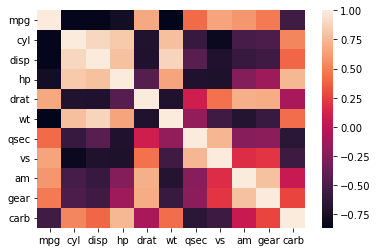

In [39]:
sns.heatmap(df.corr())

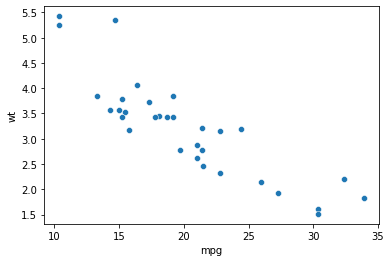

In [40]:
#There is a slight correlation between salary_in_usd and work year
#View the scatter plot of their relationship 
sns.scatterplot(x = 'mpg', y = 'wt', data = df)

A strong positive correlation between EbaccEst and Att8Est

How do we conduct linear regression using one input and output?

1. Calculate the mean of both the x and y series
2. Find the difference between all the data points and the mean of the series.
3. Square the difference.

In [41]:
def myFnLinReg(x,y):

  # To use numpy, convert the series into numpy arrays
  xa = np.array(x)
  ya = np.array(y)

  #Calculate the mean of each array 
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  #Calculate the difference between the series and the array means
  x_diff = xa - x_mean
  y_diff = ya - y_mean

  #Square the x difference 
  x_diff_sq = np.multiply(x_diff, x_diff)

  #Calculate theta1
  theta1 = np.sum(np.multiply(x_diff,y_diff))/np.sum(x_diff_sq)

  #Calculate theta0
  theta0 = ya - (theta1*xa)

  return theta1, theta0

Split the data and use the training data to train the linear regression model.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X = df.wt
y = df.mpg

In [44]:
X_train,X_test,y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)\

In [45]:
#Obtain the original parameters
org_theta1, org_theta0 = myFnLinReg(X_train, y_train)

In [46]:
print('The original parameters are, theta1 = ' + str(org_theta1) +' ,theta0 = ' + str(org_theta0))

The original parameters are, theta1 = -5.336941400557081 ,theta0 = [37.62698161 37.20679142 34.98278647 37.05907842 43.22595179 36.56581725
 35.37363849 38.1213515  33.79385498 36.34370653 35.18170405 37.4210546
 38.5582666  34.28603373 38.47479234 33.53239371 39.01916036 36.23669709
 34.65556055 41.42484307 36.15907842 38.41894235 32.71810424 43.69328747
 33.3528808 ]


In [47]:
EbaccEst0 = org_theta0 + org_theta1*5.5

print(EbaccEst0)

[ 8.27380391  7.85361372  5.62960877  7.70590071 13.87277408  7.21263954
  6.02046079  8.7681738   4.44067728  6.99052882  5.82852635  8.06787689
  9.2050889   4.93285603  9.12161464  4.17921601  9.66598266  6.88351939
  5.30238285 12.07166536  6.80590071  9.06576465  3.36492654 14.34010977
  3.9997031 ]


In [48]:
mean = np.mean(EbaccEst0)
print(mean)

7.58413261045447
